In [1]:
import nltk
import matplotlib.pyplot as plt
import random

from nltk.corpus import twitter_samples

In [2]:
# downloading the dataset
nltk.download('twitter_samples')

[nltk_data] Error loading twitter_samples: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [3]:
# positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
type(positive_tweets)

list

In [5]:
print(len(positive_tweets))
print(len(negative_tweets))

5000
5000


In [6]:
positive_tweets[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [7]:
negative_tweets[0]

'hopeless for tmr :('

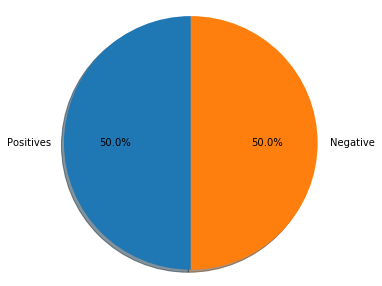

In [8]:
fig = plt.figure(figsize=(5, 5))
labels = 'Positives', 'Negative'

# size for each slides
sizes = [len(positive_tweets), len(negative_tweets)]

# pie chart
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis('equal')

plt.show()

### Preprocessed raw text for sentiment analysis
For NLP , the preprocessing steps comprised of the following steps:
- Tokenizing the string
- Lowercasing
- Removing stopwords and punctuation
- Stemming

In [9]:
tweet = positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [10]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [11]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

#### 1) Removing hyperlinks, twitter marks and styles

In [12]:
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hash tags 
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


#### 2) Tokenizing the string
It is a process of spliting the strings into individual words withour blanks or tabs. We also converts upper case letter to lower case letter.

In [13]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)
print(tweet_tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


#### 3) Removing stopwords and punctuation

In [14]:
stopwords_english = stopwords.words("english")
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
clean_tweets = []
for word in tweet_tokens:
    if (word not in stopwords_english) and (word not in string.punctuation):
        clean_tweets.append(word)
print(clean_tweets)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


#### 4) Stemming
Stemming is the process of  converting a word to its general form, or stem.This helps in reducing the size of our vocabulary

In [17]:
# instantiate the stemmer class
stemmer = PorterStemmer()

tweet_stem = []

for word in clean_tweets:
    stem_word = stemmer.stem(word)
    tweet_stem.append(stem_word)
    
print(tweet_stem)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [19]:
from utils import process_tweet

In [20]:
tweet = positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [21]:
clean_tweet = process_tweet(tweet)
print(clean_tweet)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
